In [1]:
#1. #With the iris data given in class, implement train_test_split from scratch.
#2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".
#3. Calculate time taken to fit your models using different training methods.
#4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.
#5. Simply, use classification_report from sklearn.metrics to evaluate your models.
#6. Discuss your results ie. training losses of the three methods and time taken to fit models.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#Prepare data
iris = datasets.load_iris()
X = iris.data[:,2:] #take first two features
y = iris.target #y has 3 classes so it requires multinomial
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [3]:
#data split
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]
X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [4]:
#add intercept to X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1) 
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)

In [5]:
k = len(set(y)) #num of class
m = X_train.shape[0] #num of samples
n = X_train.shape[1] #num of features 
Y_train_encoded = np.zeros((m,k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class] = 1

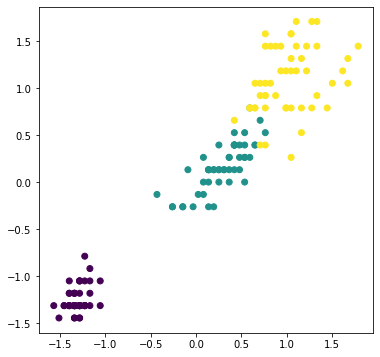

In [6]:
#visualize the data
plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1], label = "class 0", c=y)
plt.show()

In [7]:
import time
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')   
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 1.0019143575914253
Loss at iteration 500 0.19832022759167062
Loss at iteration 1000 0.15183729647355423
Loss at iteration 1500 0.1328521388647829
Loss at iteration 2000 0.12226429035839297
Loss at iteration 2500 0.11542652988474135
Loss at iteration 3000 0.1106159090547931
Loss at iteration 3500 0.10703651283384101
Loss at iteration 4000 0.10426620602450785
Loss at iteration 4500 0.10205863875660516
Loss at iteration 5000 0.10025957472140537
Loss at iteration 5500 0.09876709866061932
Loss at iteration 6000 0.09751093351018635
Loss at iteration 6500 0.0964409158978876
Loss at iteration 7000 0.09552020444065847
Loss at iteration 7500 0.09472108788582748
Loss at iteration 8000 0.0940222955537466
Loss at iteration 8500 0.09340721373121513
Loss at iteration 9000 0.09286266871232822
Loss at iteration 9500 0.09237807564766574
time taken: 0.5593607425689697
=========Classification report=======
Report:                precision    recall  f1-score   support

           0    

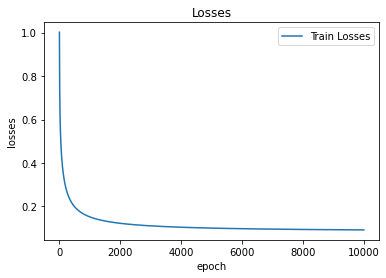

In [9]:
from sklearn.metrics import classification_report
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 0.8640490587908406
Loss at iteration 500 0.2925156192609217
Loss at iteration 1000 0.25194900546679844
Loss at iteration 1500 0.20010611077893056
Loss at iteration 2000 0.2727105836945404
Loss at iteration 2500 0.1459322395311435
Loss at iteration 3000 0.14650577941553325
Loss at iteration 3500 0.12118420553781599
Loss at iteration 4000 0.22625955958922342
Loss at iteration 4500 0.10253337043270488
Loss at iteration 5000 0.14307242889607075
Loss at iteration 5500 0.06998128432956847
Loss at iteration 6000 0.0840430779227302
Loss at iteration 6500 0.07728785890446228
Loss at iteration 7000 0.05425705481648446
Loss at iteration 7500 0.09596983342992144
Loss at iteration 8000 0.07341357964292919
Loss at iteration 8500 0.07211527713827164
Loss at iteration 9000 0.23324526773819373
Loss at iteration 9500 0.06317563421593772
time taken: 0.6912901401519775
=========Classification report=======
Report:                precision    recall  f1-score   support

           0    

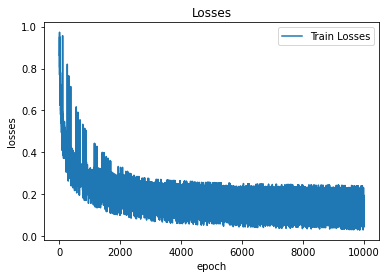

In [10]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 0.8892997565036683
Loss at iteration 500 0.5282411683437926
Loss at iteration 1000 0.3703917055587852
Loss at iteration 1500 0.6377030549434437
Loss at iteration 2000 0.6264680890422333
Loss at iteration 2500 0.16976875804077698
Loss at iteration 3000 0.3999909303942169
Loss at iteration 3500 0.4675872432322993
Loss at iteration 4000 0.6611029061886662
Loss at iteration 4500 0.9489583670735585
Loss at iteration 5000 0.10646734589655134
Loss at iteration 5500 0.9616345315327611
Loss at iteration 6000 0.09118284965335433
Loss at iteration 6500 0.10478645229902298
Loss at iteration 7000 0.8308524956059375
Loss at iteration 7500 0.08889473726129776
Loss at iteration 8000 0.07804425413160819
Loss at iteration 8500 0.09602330567004094
Loss at iteration 9000 0.0921202477600494
Loss at iteration 9500 0.10922584258349487
time taken: 0.544461727142334
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.93 

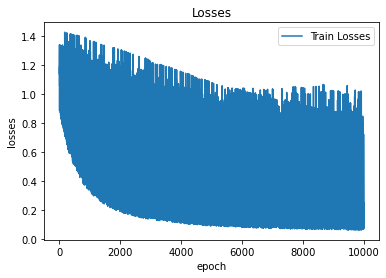

In [11]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [16]:
model = LogisticRegression(k, X_train.shape[1], "python")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".

In [ ]:
#Discuss your results ie. training losses of the three methods and time taken to fit models.
